In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Walmart_Sales_Forecasting.csv') #import dataframe
df.head() #Preview the first 5 rows of a dataframe. Pass a number for more/less rows

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
print(len(df)) # print the number of values in the data frame

421570


In [4]:
df.columns #Return column names. Note that there is no parentheses for this. This is becuase this is an attribute as opposed to a method

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [5]:
df.info() #Returns column names and details about each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [6]:
df.IsHoliday.value_counts(normalize=True) #can play with (ascending=True or False)

False    0.929642
True     0.070358
Name: IsHoliday, dtype: float64

In [7]:
df.Date.dtype #finding out object type of objects in Series 'Date'

dtype('O')

In [8]:
df.Store.unique() #How many individual stores are there?

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [9]:
#subsetting
cols = ['Store', 'Date', 'Weekly_Sales']
df[cols].head()

,Store,Date,Weekly_Sales
0,1,2010-02-05,24924.50
1,1,2010-02-12,46039.49
2,1,2010-02-19,41595.55
3,1,2010-02-26,19403.54
4,1,2010-03-05,21827.90


In [10]:
df.groupby('Store')['Weekly_Sales'].agg(['mean','max', 'min']).reset_index()

,Store,mean,max,min
0,1,21710.543621,203670.47,-863.00
1,2,26898.070031,285353.53,-1098.00
2,3,6373.033983,155897.94,-1008.96
3,4,29161.210415,385051.04,-898.00
4,5,5053.415813,93517.72,-101.26
5,6,21913.243624,342578.65,-698.00
6,7,8358.766148,222921.09,-459.00
7,8,13133.014768,153431.69,-100.00
8,9,8772.890379,139427.43,-496.00
9,10,26332.303819,693099.36,-798.00


In [11]:
grouped = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
grouped.head(10)

,Store,Weekly_Sales
0,1,21710.543621
1,2,26898.070031
2,3,6373.033983
3,4,29161.210415
4,5,5053.415813
5,6,21913.243624
6,7,8358.766148
7,8,13133.014768
8,9,8772.890379
9,10,26332.303819


In [12]:
pd.get_dummies(df['Store'])

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
sales_avg = df.groupby('Store')['Weekly_Sales'].mean() #Aggregate the data
sales_avg = sales_avg.sort_values() #Sort the Aggregation
sales_avg.head() #Preview the series


Store
5     5053.415813
33    5728.414053
44    6038.929814
3     6373.033983
38    7492.478460
Name: Weekly_Sales, dtype: float64

Text(0.5,0,'Average Weekly Sales')

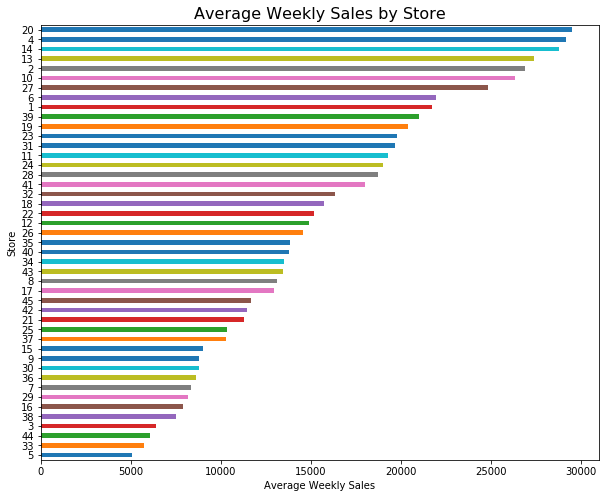

In [14]:
plt.figure(figsize=(10,8)) #Manually creates a figure object and specifies the size (will be useful for subplots later too)
sales_avg.plot(kind='barh') #Same Visual code as before
plt.title('Average Weekly Sales by Store', fontsize=16)
plt.xlabel('Average Weekly Sales') #Add Axis Label (y already labelled)

In [15]:
hol_avg = df.groupby('IsHoliday')['Weekly_Sales'].mean() #Aggregate the data
hol_avg = hol_avg.sort_values() #Sort the Aggregation
hol_avg.head() #Preview the series

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64

Text(0.5,0,'Average Weekly Sales')

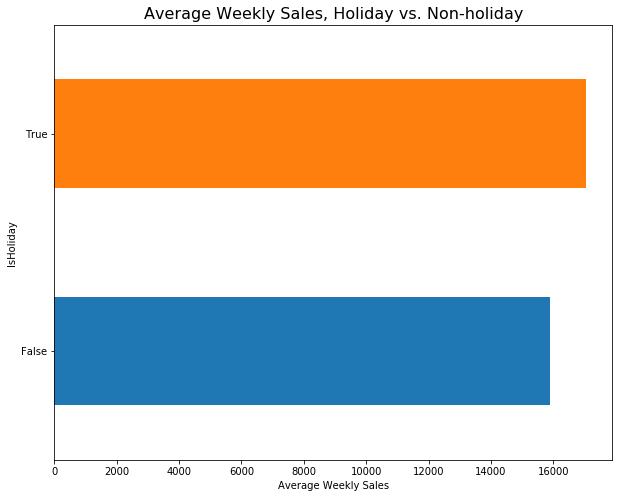

In [16]:
plt.figure(figsize=(10,8)) #Manually creates a figure object and specifies the size (will be useful for subplots later too)
hol_avg.plot(kind='barh') #Same Visual code as before
plt.title('Average Weekly Sales, Holiday vs. Non-holiday', fontsize=16)
plt.xlabel('Average Weekly Sales') #Add Axis Label (y already labelled)

In [17]:
weekly_rates = df.Weekly_Sales
print(len(weekly_rates), type(weekly_rates), weekly_rates[:5])


421570 <class 'pandas.core.series.Series'> 0    24924.50
1    46039.49
2    41595.55
3    19403.54
4    21827.90
Name: Weekly_Sales, dtype: float64


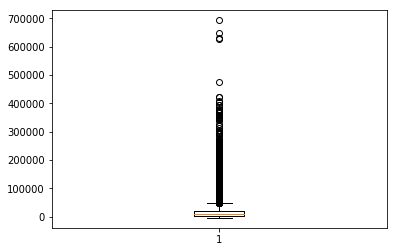

In [18]:
plt.boxplot(list(weekly_rates));

In [19]:
weekly_rates.median()

7612.03

In [20]:
weekly_rates.min()

-4988.94

In [21]:
weekly_rates.max()

693099.36

In [22]:
print('25th percentile:', weekly_rates.quantile(q=.25))
print('75th percentile:', weekly_rates.quantile(q=.75))

25th percentile: 2079.65
75th percentile: 20205.8525


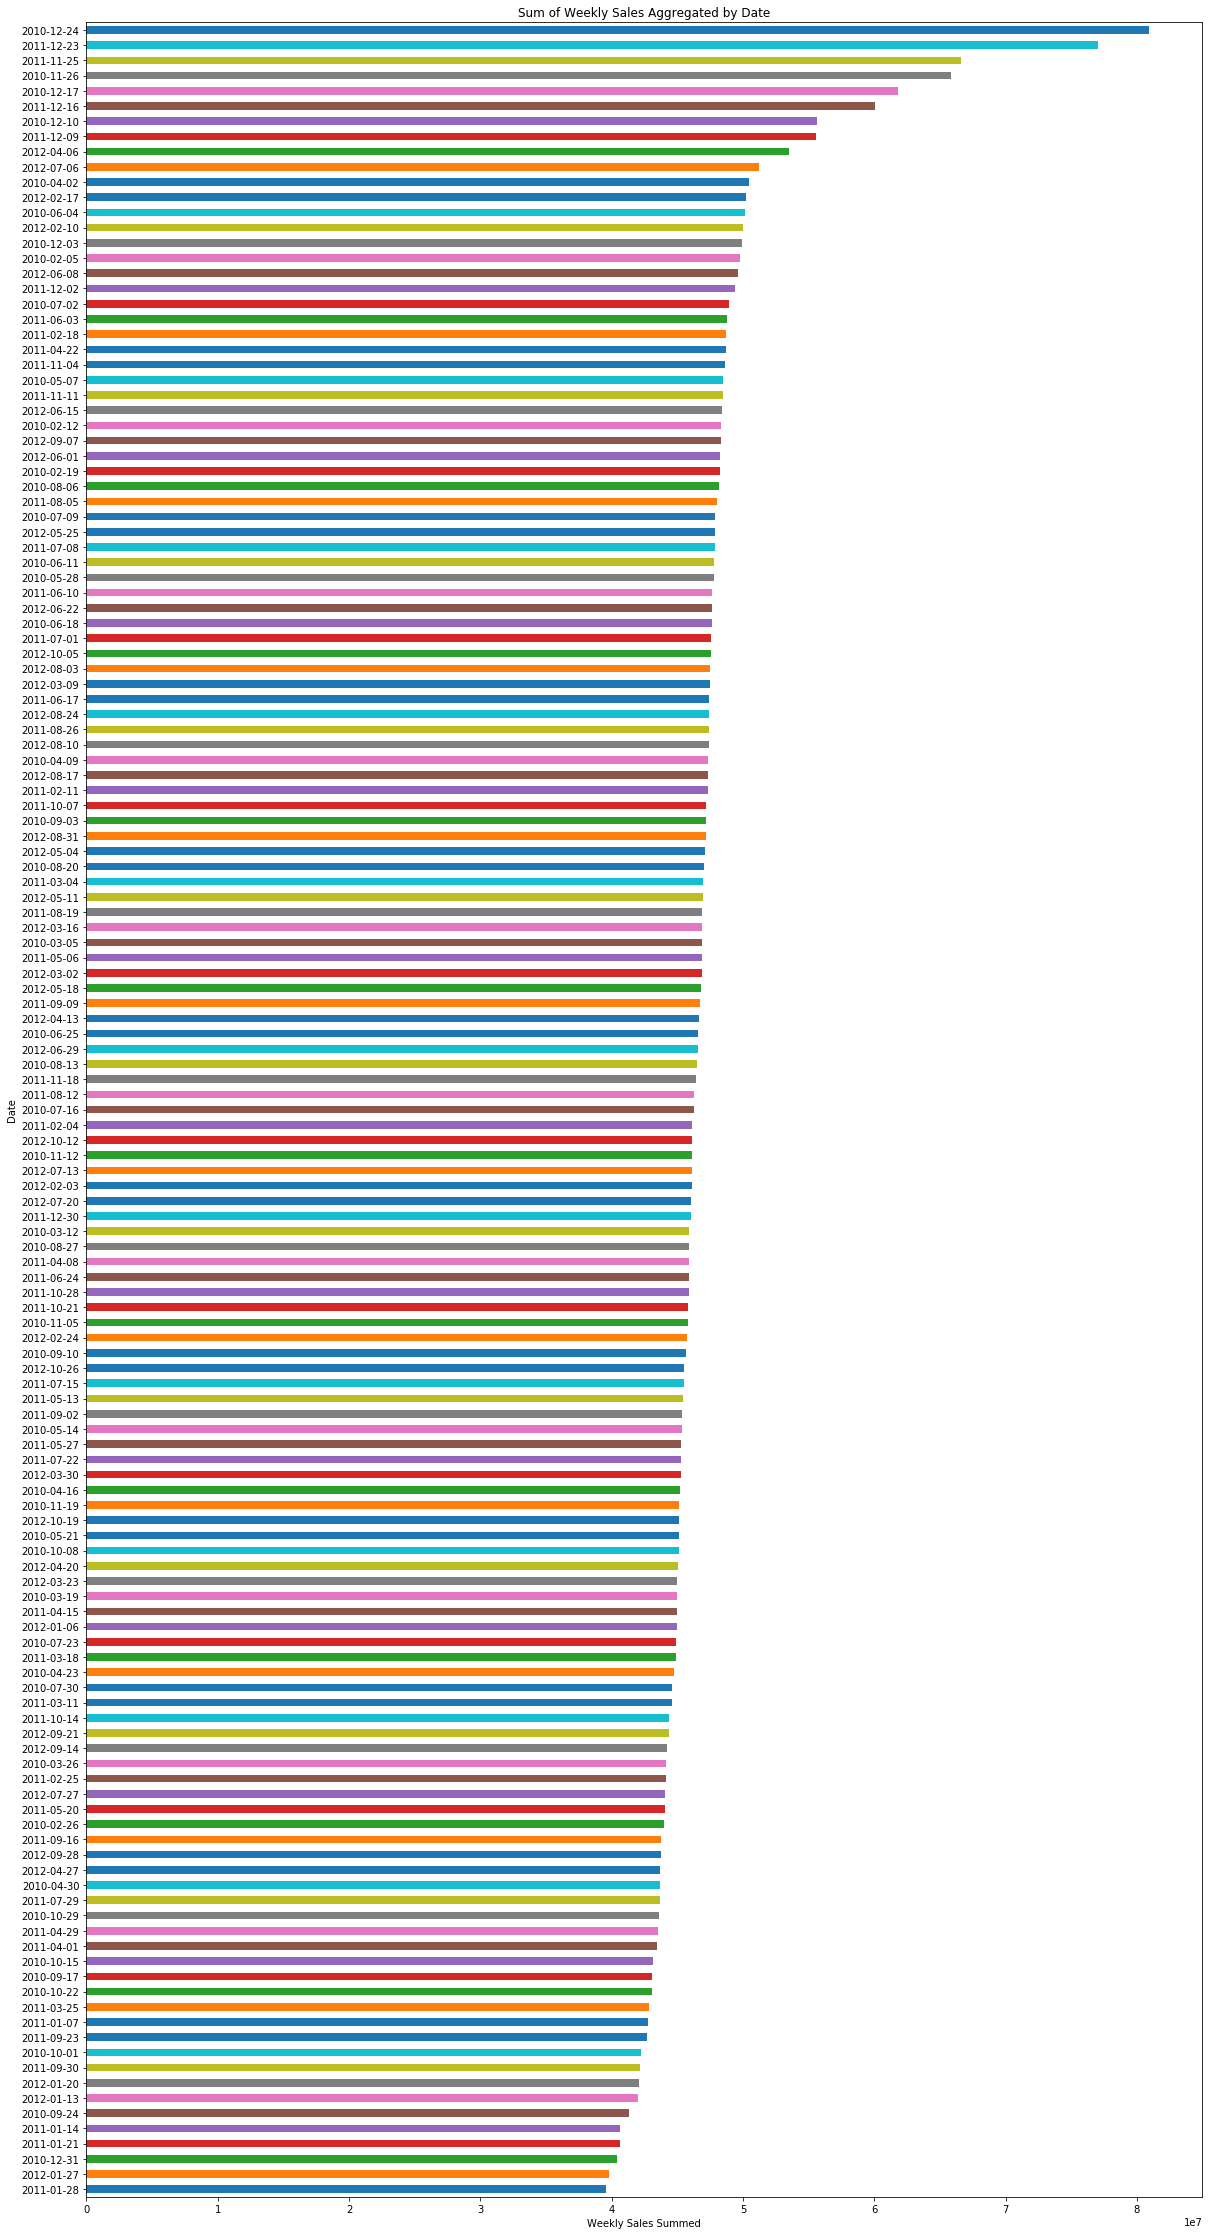

In [23]:
df.groupby('Date')['Weekly_Sales'].sum().sort_values().plot(kind='barh', figsize=(20,40));
plt.title('Sum of Weekly Sales Aggregated by Date')
plt.xlabel('Weekly Sales Summed');

In [24]:
#I want a bit more information to work with to better understand the patterns in sales. 

In [25]:
#As usual we begin by importing our dataset
df1 = pd.read_csv('features.csv')
print('Length of Dataset: ', len(df1))
print('Column Names:\n', df1.columns)
df1.head()

Length of Dataset:  8190
Column Names:
 Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [26]:
final = pd.merge(df1, df, on=['Store', 'Date']) #which two dataframes to combine, and what columns to merge data in on.
final.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,False
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,False
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,False
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,False


In [27]:
# dropping null values
final = final.dropna()

In [28]:
final.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
6587,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,1,18689.54,False
6588,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,2,44936.47,False
6589,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,3,9959.64,False
6590,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,4,36826.52,False
6591,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,5,31002.65,False


In [29]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97056 entries, 6587 to 421569
Data columns (total 15 columns):
Store           97056 non-null int64
Date            97056 non-null object
Temperature     97056 non-null float64
Fuel_Price      97056 non-null float64
MarkDown1       97056 non-null float64
MarkDown2       97056 non-null float64
MarkDown3       97056 non-null float64
MarkDown4       97056 non-null float64
MarkDown5       97056 non-null float64
CPI             97056 non-null float64
Unemployment    97056 non-null float64
IsHoliday_x     97056 non-null bool
Dept            97056 non-null int64
Weekly_Sales    97056 non-null float64
IsHoliday_y     97056 non-null bool
dtypes: bool(2), float64(10), int64(2), object(1)
memory usage: 10.6+ MB


In [30]:
#I want to predict values for Weekly_Sales

In [31]:
#Define X and y
X = final[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1',
           'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
           'CPI', 'Unemployment']] #features we think may help predict y
y = final['Weekly_Sales'] #what we want to predict

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
#A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

72792 24264 72792 24264


In [35]:
from sklearn.linear_model import LinearRegression

#Initialize a regression object
linreg = LinearRegression()

In [36]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [39]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 607725910.2835866
Test Mean Squarred Error: 584112293.6242318


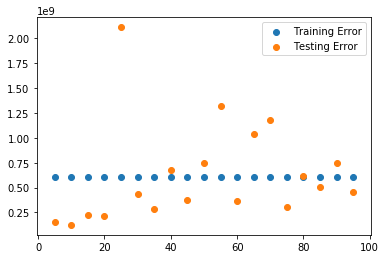

In [42]:
#Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test 
#split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) 
#for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size)
#on a graph.
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

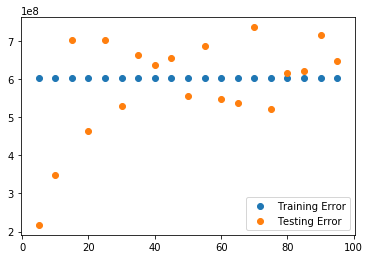

In [43]:
#accounting for any particularly good/bad models that might result by random chance from those samples by 
#generating at least 3 iterations of models/errors and saving the average train/test error
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(8):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

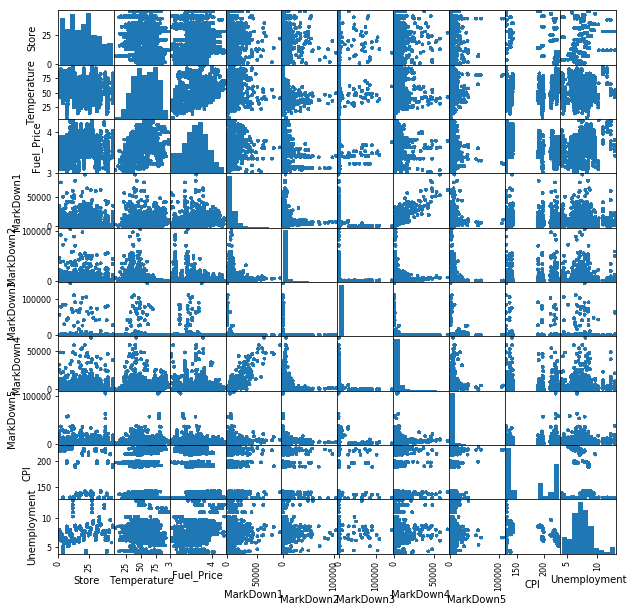

In [44]:
pd.plotting.scatter_matrix(X, figsize=(10,10));

[[1.         0.82892769]
 [0.82892769 1.        ]]


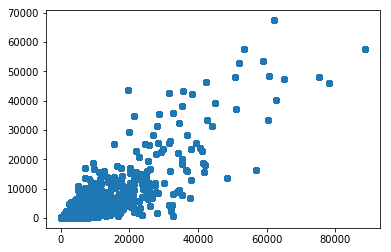

In [50]:
x , y = final.MarkDown1, final.MarkDown4
print(np.corrcoef(x,y))
plt.scatter(x,y)

[[1.         0.82892769]
 [0.82892769 1.        ]]


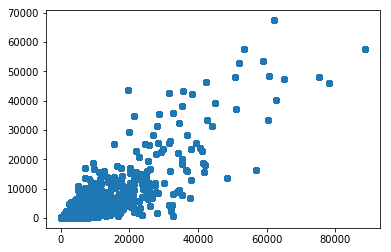

In [52]:
temp = final[(~final.MarkDown1.isnull())
         & (~final.MarkDown4.isnull())]
x , y = temp.MarkDown1, temp.MarkDown4
print(np.corrcoef(x,y))
plt.scatter(x,y)

In [53]:
final.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
6587,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,1,18689.54,False
6588,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,2,44936.47,False
6589,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,3,9959.64,False
6590,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,4,36826.52,False
6591,1,2011-11-11,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,5,31002.65,False


In [54]:
#1) Import packages
from sklearn.linear_model import LinearRegression

#2) Define X and y
X = final[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
        'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Dept']] #Only numeric features work

y = final['Weekly_Sales']

#3) Initialize a regression object
linreg = LinearRegression()

# 4) Fit the model
linreg.fit(X, y)

# 5) Use the model to predict outputs
final['Estimated_Weekly_Sales'] = linreg.predict(X)

# 6) Measure performance
# Here we print the model's R^2 to measure overall performance; the correlation between our model and the data
print('R^2 model score:', linreg.score(X,y), '\n')

R^2 model score: 0.034802219578679794 



In [55]:
#1) Import packages
from sklearn.linear_model import LinearRegression

#2) Define X and y
X = final[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
        'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Dept']] #Only numeric features work

y = final['Weekly_Sales']

#3) Initialize a regression object
linreg = LinearRegression()

# 4) Fit the model
linreg.fit(X, y)

# 5) Use the model to predict outputs
final['Estimated_Weekly_Sales'] = linreg.predict(X)

# 6) Measure performance
# Here we print the model's R^2 to measure overall performance; the correlation between our model and the data
print('R^2 model score:', linreg.score(X,y), '\n')

#Print the coefficients for the model's formula
print('Model feature coefficients:')
weight_dict = dict(zip(X.columns, linreg.coef_))
for feat, coeff in list(zip(X.columns, linreg.coef_)):
    print(feat, 'Coefficient weight: {}'.format(round(coeff, 4)))

R^2 model score: 0.034802219578679794 

Model feature coefficients:
Store Coefficient weight: -108.1617
Temperature Coefficient weight: 38.4918
Fuel_Price Coefficient weight: -827.9562
MarkDown1 Coefficient weight: 0.1411
MarkDown2 Coefficient weight: 0.0635
MarkDown3 Coefficient weight: 0.1624
MarkDown4 Coefficient weight: -0.0512
MarkDown5 Coefficient weight: 0.2407
CPI Coefficient weight: -30.2301
Unemployment Coefficient weight: -615.576
Dept Coefficient weight: 112.2021


In [63]:
#coefficients in the model themselves lose interpretability
#what happens to the coefficients when we remove a feature with correlation to others


#1) Import packages
from sklearn.linear_model import LinearRegression

#2) Define X and y
#Removed MarkDown4
X = final[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
        'MarkDown5', 'CPI', 'Unemployment', 'Dept']] #Only numeric features work

y = final['Weekly_Sales']

#3) Initialize a regression object
linreg = LinearRegression()

# 4) Fit the model
linreg.fit(X, y)

# 5) Use the model to predict outputs
final['Estimated_Weekly_Sales'] = linreg.predict(X)

# 6) Measure performance
# Here we print the model's R^2 to measure overall performance; the correlation between our model and the data
print('R^2 model score:', linreg.score(X,y), '\n')

#Save results
new_weight_dict = dict(zip(X.columns, linreg.coef_))

#Print the coefficients for the model's formula
print('Model feature coefficients:')
for feat, coeff in list(zip(X.columns, linreg.coef_)):
    print(feat, 'Coefficient weight: {}'.format(round(coeff, 4)))

R^2 model score: 0.03473682576876003 

Model feature coefficients:
Store Coefficient weight: -108.0325
Temperature Coefficient weight: 39.7291
Fuel_Price Coefficient weight: -692.1175
MarkDown1 Coefficient weight: 0.1078
MarkDown2 Coefficient weight: 0.0658
MarkDown3 Coefficient weight: 0.1621
MarkDown5 Coefficient weight: 0.2407
CPI Coefficient weight: -29.8958
Unemployment Coefficient weight: -612.1828
Dept Coefficient weight: 112.1943


In [66]:
pd.get_dummies(final.Store).head()

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
6587,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6588,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6589,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6590,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
final.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday_x', 'Dept', 'Weekly_Sales', 'IsHoliday_y',
       'Estimated_Weekly_Sales'],
      dtype='object')

In [70]:
df.IsHoliday.value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [71]:
df.IsHoliday = df.IsHoliday.map({True:1, False:0})
df.IsHoliday.value_counts()

0    391909
1     29661
Name: IsHoliday, dtype: int64

In [74]:
#If your categorical variables are non numeric you can do multiple at a time

for col in ['Store', 'Dept']:
    final[col] = final[col].astype(str) #Make nonumeric
X = pd.get_dummies(final[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
        'MarkDown5', 'CPI', 'Unemployment', 'Dept']])
X.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,Store_1,Store_10,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
6587,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,1,0,...,0,0,0,0,0,0,0,0,0,0
6588,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,1,0,...,0,0,0,0,0,0,0,0,0,0
6589,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,1,0,...,0,0,0,0,0,0,0,0,0,0
6590,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,1,0,...,0,0,0,0,0,0,0,0,0,0
6591,59.11,3.297,10382.9,6115.67,215.07,6551.42,217.998085,7.866,1,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
y = final['Weekly_Sales']

#3) Initialize a regression object
linreg = LinearRegression()

# 4) Fit the model
linreg.fit(X, y)

# 5) Use the model to predict outputs
final['Estimated_Weekly_Sales'] = linreg.predict(X)

# 6) Measure performance
# Here we print the model's R^2 to measure overall performance; the correlation between our model and the data
print('R^2 model score:', linreg.score(X,y), '\n')

#Save results
new_weight_dict = dict(zip(X.columns, linreg.coef_))

#Print the coefficients for the model's formula
print('Model feature coefficients:')
for feat, coeff in list(zip(X.columns, linreg.coef_)):
    print(feat, 'Coefficient weight: {}'.format(round(coeff, 4)))

R^2 model score: 0.6814282991867601 

Model feature coefficients:
Temperature Coefficient weight: -4.6237
Fuel_Price Coefficient weight: -2809.3329
MarkDown1 Coefficient weight: -0.0231
MarkDown2 Coefficient weight: -0.0705
MarkDown3 Coefficient weight: 0.0836
MarkDown5 Coefficient weight: -0.0135
CPI Coefficient weight: -275.5855
Unemployment Coefficient weight: 1149.475
Store_1 Coefficient weight: 20746.2182
Store_10 Coefficient weight: 1875.4373
Store_11 Coefficient weight: 19246.5874
Store_12 Coefficient weight: -15525.4278
Store_13 Coefficient weight: 3935.7681
Store_14 Coefficient weight: 15996.9672
Store_15 Coefficient weight: -16324.8283
Store_16 Coefficient weight: -13.1295
Store_17 Coefficient weight: -12505.1791
Store_18 Coefficient weight: -9870.4483
Store_19 Coefficient weight: -4390.4217
Store_2 Coefficient weight: 26117.2329
Store_20 Coefficient weight: 27703.2869
Store_21 Coefficient weight: 8975.587
Store_22 Coefficient weight: -8752.8097
Store_23 Coefficient weight: -

In [76]:
#feature selection with r^2


X = final.drop('Weekly_Sales', axis=1)
y = final.Weekly_Sales

In [77]:
ols = LinearRegression()
model_scores = {}
for col in X.columns:
    try:
        train_r2 = []
        test_r2 = []
        for i in range(3):
            X_train, X_test, y_train, y_test = train_test_split(X, y)
            ols.fit(np.array(X_train[col]).reshape(-1,1), y_train)
            train_r2.append(ols.score(np.array(X_train[col]).reshape(-1,1), y_train))
            test_r2.append(ols.score(np.array(X_test[col]).reshape(-1,1), y_test))
        model_scores[col] = (np.mean(train_r2), np.mean(test_r2))
        if col == 'OverallQual':
            print(model_scores[col])
    except:
        continue
#         print("Couldn't perform regression using {}, probably not a numeric feature.".format(col))
#         print("Top feature attributes:\n", df[col].value_counts(normalize=True)[:5])
model_scores = pd.DataFrame.from_dict(model_scores, orient='index')
model_scores.columns = ['Train_r2', 'Test_r2']
model_scores = model_scores.sort_values(by='Test_r2', ascending=False)
model_scores.head()

,Train_r2,Test_r2
Estimated_Weekly_Sales,0.681424,0.682061
Dept,0.019090,0.017808
MarkDown3,0.003808,0.004176
MarkDown5,0.003533,0.003625
Store,0.002872,0.002933


In [79]:
ols = LinearRegression()
model2_scores = {}
cur_feats = ['MarkDown3']
for iteration, col in enumerate(X.columns):
    try:
        train_r2 = []
        test_r2 = []
        feats = cur_feats + [col]
        for i in range(3):
            X_train, X_test, y_train, y_test = train_test_split(X, y)
            ols.fit(X_train[feats], y_train)
            train_r2.append(ols.score(X_train[feats], y_train))
            test_r2.append(ols.score(X_test[feats], y_test))
        model2_scores[col] = (np.mean(train_r2), np.mean(test_r2))
    except Exception as e:
        if iteration < 5:
            print(e)
        continue
#         print("Couldn't perform regression using {}, probably not a numeric feature.".format(col))
#         print("Top feature attributes:\n", df[col].value_counts(normalize=True)[:5])
model2_scores = pd.DataFrame.from_dict(model2_scores, orient='index')
model2_scores.columns = ['Train_r2', 'Test_r2']
model2_scores = model2_scores.sort_values(by='Test_r2', ascending=False)
model2_scores.head()

could not convert string to float: '2012-03-16'


,Train_r2,Test_r2
Estimated_Weekly_Sales,0.681761,0.680472
Dept,0.022935,0.021472
MarkDown5,0.008448,0.005726
Store,0.007002,0.005707
IsHoliday_y,0.003621,0.005494


In [ ]:
#feature selection with mse

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [84]:
def add_feature(cur_feats, X, y):
    ols = LinearRegression()
    model_scores = {}
    for iteration, col in enumerate(X.columns):
        try:
            train_err = []
            test_err = []
            feats = cur_feats + [col]
            for i in range(3):
                X_train, X_test, y_train, y_test = train_test_split(X, y)
                ols.fit(X_train[feats], y_train)
                y_hat_train = ols.predict(X_train[feats])
                y_hat_test = ols.predict(X_test[feats])
                train_err.append(mean_squared_error(y_train, y_hat_train))
                test_err.append(mean_squared_error(y_test, y_hat_test))
            model_scores[col] = (np.mean(train_err), np.mean(test_err))
        except Exception as e:
#             if iteration < 5:
#                 print(e)
            continue
    model_scores = pd.DataFrame.from_dict(model_scores, orient='index')
    model_scores.columns = ['Train_err', 'Test_err']
    model_scores = model_scores.sort_values(by='Test_err')
    new_feat = model_scores.index[0]
    cur_feats.append(new_feat)
    new_model_scores = [len(cur_feats)] + list(model_scores.iloc[0])
    return cur_feats, new_model_scores

In [ ]:
#exploring lasso

In [90]:
final = final.drop('Date', axis=1)

X = final.drop('Weekly_Sales', axis=1)
#Impute null values
for col in X:
    avg = X[col].mean()
    X[col] = X[col].fillna(value=avg)
y = final.Weekly_Sales

X_train, X_test, y_train, y_test = train_test_split(X,y)
ols = LinearRegression(normalize=True)
ols.fit(X_train, y_train)
print('Training r^2:', ols.score(X_train, y_train))
print('Testing r^2:', ols.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, ols.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, ols.predict(X_test)))

Training r^2: 0.6774169717503203
Testing r^2: 0.6939662206345822
Training MSE: 198610341.64207846
Testing MSE: 183503673.24832815


In [92]:
from sklearn.linear_model import Lasso, Ridge

In [93]:
L1 = Lasso() #Lasso is also known as the L1 norm.
L1.fit(X_train, y_train)
print('Training r^2:', L1.score(X_train, y_train))
print('Testing r^2:', L1.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, L1.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, L1.predict(X_test)))

Training r^2: 0.6774169155699994
Testing r^2: 0.6939650065557001
Training MSE: 198610376.2316004
Testing MSE: 183504401.2331112


In [94]:
L1 = Lasso(alpha=5) #Lasso is also known as the L1 norm.
L1.fit(X_train, y_train)
print('Training r^2:', L1.score(X_train, y_train))
print('Testing r^2:', L1.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, L1.predict(X_train)))
print('Testing MSE:', mean_squared_error(y_test, L1.predict(X_test)))

Training r^2: 0.6774159038003724
Testing r^2: 0.693959593551603
Training MSE: 198610999.16552344
Testing MSE: 183507646.97329453


In [110]:
#cross validation
def kfolds(data, k):
    #Force data as pandas dataframe
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds #folds should be a list of subsets of data

In [111]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [112]:
final.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Estimated_Weekly_Sales
6587,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,1,18689.54,False,29110.225267
6588,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,2,44936.47,False,58914.802923
6589,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,3,9959.64,False,22282.871827
6590,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,4,36826.52,False,37318.160687
6591,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,5,31002.65,False,33559.253647


In [124]:
X = final[['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
        'MarkDown5', 'CPI', 'Unemployment']] #Only numeric features work

y = final['Weekly_Sales']

In [125]:
folds = kfolds(final, k=10)

In [126]:
folds[0]

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Estimated_Weekly_Sales
6587,1,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,1,18689.54,False,29110.225267
6588,1,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,2,44936.47,False,58914.802923
6589,1,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,3,9959.64,False,22282.871827
6590,1,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,4,36826.52,False,37318.160687
6591,1,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,5,31002.65,False,33559.253647
6592,1,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,6,3527.62,False,11597.550521
6593,1,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,7,25942.35,False,39628.973332
6594,1,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,8,34003.52,False,42498.479160
6595,1,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,9,37670.13,False,31366.841981
6596,1,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,10,32346.54,False,29801.109913


In [127]:
folds[8]

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Estimated_Weekly_Sales
303527,31,80.38,3.666,6570.37,16.73,0.15,354.35,7577.57,222.616433,6.565,False,34,10829.44,False,16960.116706
303528,31,80.38,3.666,6570.37,16.73,0.15,354.35,7577.57,222.616433,6.565,False,35,1430.50,False,4050.861310
303529,31,80.38,3.666,6570.37,16.73,0.15,354.35,7577.57,222.616433,6.565,False,36,233.44,False,3124.065696
303530,31,80.38,3.666,6570.37,16.73,0.15,354.35,7577.57,222.616433,6.565,False,37,2296.49,False,519.709247
303531,31,80.38,3.666,6570.37,16.73,0.15,354.35,7577.57,222.616433,6.565,False,38,69878.34,False,66756.646525
303532,31,80.38,3.666,6570.37,16.73,0.15,354.35,7577.57,222.616433,6.565,False,40,57627.55,False,54338.094826
303533,31,80.38,3.666,6570.37,16.73,0.15,354.35,7577.57,222.616433,6.565,False,41,2190.51,False,3283.059387
303534,31,80.38,3.666,6570.37,16.73,0.15,354.35,7577.57,222.616433,6.565,False,42,5095.29,False,7799.278217
303535,31,80.38,3.666,6570.37,16.73,0.15,354.35,7577.57,222.616433,6.565,False,44,2005.41,False,6295.460740
303536,31,80.38,3.666,6570.37,16.73,0.15,354.35,7577.57,222.616433,6.565,False,46,22174.20,False,25799.822181


In [128]:
def mse(residual_col):
#     residual_col = pd.Series(residual_col)
    return np.mean(residual_col.astype(float).map(lambda x: x**2))

In [123]:
#I really can't figure this out

test_errs = []
train_errs = []
k=10

for n in range(k):
    #Split into the train and test sets for this fold
    train = pd.concat([fold for i, fold in enumerate(folds) if i!=n])
    test = folds[n]
    #Fit Linear Regression Model
    ols = LinearRegression()
    ols.fit(train[X], train[y])
    #Evaluate Train and Test Errors
    y_hat_train = ols.predict(train[X])
    y_hat_test = ols.predict(test[X])
    train_residuals = y_hat_train - train[y]
    test_residuals = y_hat_test - test[y]
#     print(y_hat_train)
#     print(train[y_feat])
#     print(train_residuals)
    train_errs.append(mse(train_residuals))
    test_errs.append(mse(test_residuals))

# plt.bar(range(k), test_errs, label='Test MSE')
# plt.bar(range(k), train_errs, label='Train MSE')
# plt.legend(bbox_to_anchor=(1,1))
to_plot = pd.DataFrame(test_errs, train_errs).reset_index()
to_plot.columns = ['Test MSE', 'Train MSE']
to_plot.plot(kind='bar')

ValueError: Must pass DataFrame with boolean values only

In [ ]:
###for n, fold in enumerate(folds):
   ### plt.scatter(fold['Weekly_Sales'], fold['domgross'], label='Fold {}'.format(n))
###plt.legend(bbox_to_anchor=(1,1))